In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Labeling**

In [ ]:
import pandas as pd
meteo_bc_gases_excel_file_path = '/content/drive/MyDrive/Forest_Fire_Data/updated/Gases_BC_Meteo_Merged_Final.csv'

meteo_bc_gases_data = pd.read_csv(meteo_bc_gases_excel_file_path)

In [ ]:
# Remove rows where values in 'fireOccFlag' are equal to 0
meteo_bc_gases_data_FireOccurance = meteo_bc_gases_data.loc[meteo_bc_gases_data['fireOccFlag'] != 0]

meteo_bc_gases_data_FireOccurance

# Remove 'fireOccFlag' from the DataFrame
meteo_bc_gases_data_FireOccurance = meteo_bc_gases_data_FireOccurance.drop('fireOccFlag', axis=1)

In [ ]:
meteo_bc_gases_data_FireOccurance

,start_time,WS_ave(m/s),WD_ave(deg),T_air(C),RH(-),P_air(hPa),BC-mass-filter,BC-mass,BC-mass-from-trasm,CO_Calib,CO_sync_std,CO2_Calib,CO2_dry_sync_std,CH4_Calib,CH4_dry_sync_std,decimal_time
79167,56.500000,2.5,274.0,14.8,69.7,1026.8,12.37085,0.82548,0.66334,174.660284,0.005908,423.806027,0.199252,1985.529691,0.000563,56.500000
79168,56.500694,4.2,270.0,14.8,69.2,1026.8,12.38485,0.83925,0.94066,174.554839,0.004516,423.401581,0.309431,1987.662455,0.002232,56.500694
79169,56.501389,4.0,273.0,14.8,68.5,1026.8,12.40480,1.19699,1.10536,173.579055,0.004121,423.854995,0.296770,1986.459649,0.001621,56.501389
79170,56.502083,4.6,267.0,14.7,69.0,1026.8,12.41841,0.81663,0.80009,176.533601,0.003901,424.434274,0.093598,1987.704095,0.001018,56.502083
79171,56.502778,4.0,273.0,14.6,69.2,1026.7,12.43380,0.92238,0.83927,176.976802,0.004630,423.839704,0.349614,1987.791667,0.000602,56.502778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484565,346.694444,6.6,306.0,13.6,47.4,1020.2,9.25548,0.19363,0.05258,132.147647,0.006600,423.649175,0.106303,2012.617890,0.001457,346.694444
484566,346.695139,7.5,301.0,13.7,48.0,1020.2,9.25817,0.16146,0.04262,131.419032,0.005775,423.637290,0.105854,2011.896636,0.001425,346.695139
484567,346.695833,8.1,303.0,13.7,48.2,1020.2,9.25970,0.09200,0.08198,129.281793,0.005290,423.588429,0.061358,2012.193527,0.001798,346.695833
484568,346.696528,8.7,294.0,13.7,49.3,1020.2,9.26344,0.22423,0.39801,132.560915,0.003593,423.676091,0.124119,2012.213564,0.001325,346.696528


In [ ]:
import geopandas as gpd

shapefile_path = '/content/drive/MyDrive/Forest_Fire_Data/updated/Wildfires2021/WildFires 2021.shp'

# Read the Shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

In [ ]:
# Drop columns with all NaN values
gdf_filtered = gdf.dropna(axis=1, how='all')

# Display the modified GeoDataFrame
print(gdf_filtered.head())

  CodUff  Anno NumeProg CodiCate CodiSott CodiSpec CodiRegi CodiProv CodiComu  \
0  42811  2021        2        3      400        9       18      078      156   
1  42810  2021        1        3      400        9       18      079      002   
2  42754  2021        1        3      400        9       18      078      154   
3  42777  2021        2        3      400        9       18      101      006   
4  42758  2021        1        3      400        9       18      078      052   

                      Localita  ... Allarme NoteInte UffPubb  \
0                      grimoli  ...       3     None   42805   
1                Pian del Pero  ...       6     None   42805   
2               FONTANA FICARA  ...       6     None   42746   
3  BODINO - CASELLA DEL NOTARO  ...       3     None   42777   
4                     DIAMANTE  ...       3     None   42746   

                                            NoteAcce DurInt DataInRipr  \
0  Arrivati sulla zona l'incendio era in bonifica...  

In [ ]:
gdf_filtered.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Reproject the GeoDataFrame to EPSG:4326 (WGS 84)
gdf_filtered = gdf_filtered.to_crs(epsg=4326)

In [ ]:
gdf_filtered.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Create empty lists to store latitude and longitude values of centroids
centroid_lats, centroid_lons = [], []

# Iterate through each geometry in the GeoDataFrame
for geometry in gdf_filtered['geometry']:
    # Find the centroid of the geometry
    centroid = geometry.centroid
    # Extract latitude and longitude from the centroid
    centroid_lat = centroid.y
    centroid_lon = centroid.x

    # Ensure that the latitude is within the valid range [-90, 90]
    if -90 <= centroid_lat <= 90:
        centroid_lats.append(centroid_lat)
    if -180 <= centroid_lat <= 180:
        centroid_lons.append(centroid_lon)

gdf_filtered['Latitudes'] = centroid_lats
gdf_filtered['Longitudes'] = centroid_lons

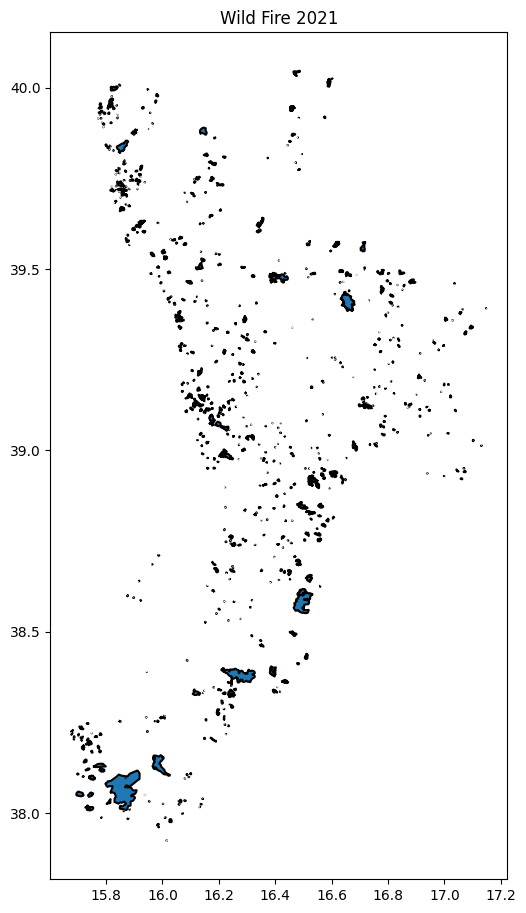

In [ ]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
ax = gdf_filtered.plot(edgecolor='black', linewidth=1.5, figsize=(11, 11))

# Customize the plot
ax.set_title('Wild Fire 2021')

# Display the plot
plt.show()

In [ ]:
#the latitude and longitude values where obseervatory recorded meteo 2021 data
given_latitude = 38.87629818
given_longitude =  16.23220074

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import math


# Function to calculate distance using Haversine formula
def calculate_distance(row):
    coords_1 = (given_latitude, given_longitude)
    coords_2 = (row['Latitudes'], row['Longitudes'])
    return geodesic(coords_1, coords_2).km


# Function to calculate direction in 8 points
def calculate_direction_8points(row):
    lat1, lon1 = math.radians(given_latitude), math.radians(given_longitude)
    lat2, lon2 = math.radians(row['Latitudes']), math.radians(row['Longitudes'])

    d_lon = lon2 - lon1

    x = math.sin(d_lon) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(d_lon))

    initial_bearing = math.atan2(x, y)

    # Convert bearing from radians to degrees
    initial_bearing = math.degrees(initial_bearing)

    # Normalize the bearing to a compass bearing
    compass_bearing = (initial_bearing + 360) % 360

    # Define 8-point directions
    directions = ["North", "North-East", "East", "South-East", "South", "South-West", "West", "North-West"]

    # Calculate the index for the closest direction
    direction_index = round(compass_bearing / 45) % 8

    return directions[direction_index]


In [ ]:
pip install geopy

In [ ]:
import geopy
from geopy.distance import geodesic

# Apply the modified function to create a new 'Direction_8points' column
gdf_filtered['Direction_8points'] = gdf_filtered.apply(calculate_direction_8points, axis=1)

# Create the 'Distance' column
gdf_filtered['Distance'] = gdf_filtered.apply(calculate_distance, axis=1)

In [ ]:
len(gdf_filtered['Distance'].unique())

740

In [ ]:
gdf_filtered['Distance'].max()


131.3455224366765

In [ ]:
gdf_filtered['Distance'].min()

2.574936932045084

In [ ]:
# Define the distance ranges
distance_ranges = [(0, 20), (20, 40), (40, 60),(60, 80), (80, 100),(100, 110), (110, 120),(120, 140), (140, 160),(160, 180), (180, 200)]  # Add more ranges as needed

# Create a function to assign distance ranges
def assign_distance_range(distance):
    for start, end in distance_ranges:
        if start <= distance <= end:
            return f"{start}-{end} km"
    print(distance)
    return f"{distance}+ km"


# Apply the function to create the 'Distance_Range' column
gdf_filtered['Distance_Range'] = gdf_filtered['Distance'].apply(assign_distance_range)

# Display the updated GeoDataFrame
print(gdf_filtered[['Distance', 'Distance_Range']])

       Distance Distance_Range
0     48.479336       40-60 km
1     36.165319       20-40 km
2    111.511747     110-120 km
3     64.995463       60-80 km
4     45.051174       40-60 km
..          ...            ...
735   94.327690      80-100 km
736  112.787248     110-120 km
737   98.914638      80-100 km
738   30.207917       20-40 km
739   86.610486      80-100 km

[740 rows x 2 columns]


In [ ]:
print(len(gdf_filtered['Distance_Range'].unique()))
print(len(gdf_filtered['Direction_8points'].unique()))

8
7


In [ ]:

date_time_columns = ['DataInInte','DataFnInte']

gdf_filtered[date_time_columns] = gdf_filtered[date_time_columns].apply(pd.to_datetime)
#year_month_date

# Convert each combined datetime value to a decimal point representing days with minutes and seconds
gdf_filtered['FireStart_Decimal'] = (gdf_filtered['DataInInte'] - pd.to_datetime(gdf_filtered['DataInInte'].dt.year, format='%Y')) / pd.Timedelta(days=1)

# Convert each combined datetime value to a decimal point representing days with minutes and seconds
gdf_filtered['FireEnd_Decimal'] = (gdf_filtered['DataFnInte'] - pd.to_datetime(gdf_filtered['DataFnInte'].dt.year, format='%Y')) / pd.Timedelta(days=1)

In [ ]:
# Iterate through gdf_filtered and update meteo2021_data
for index, row in gdf_filtered.iterrows():
    # Define the condition
    condition = (
        (meteo_bc_gases_data_FireOccurance['start_time'] >= row['FireStart_Decimal']) &
        (meteo_bc_gases_data_FireOccurance['start_time'] <= row['FireEnd_Decimal'])
    )

    # Check the condition and update meteo2021_data
    meteo_bc_gases_data_FireOccurance.loc[condition, 'Distance_Range'] = row['Distance_Range']
    meteo_bc_gases_data_FireOccurance.loc[condition, 'Direction_8points'] = row['Direction_8points']


# Display the updated meteo2021_data
print(meteo_bc_gases_data_FireOccurance[['Distance_Range', 'Direction_8points']])

       Distance_Range Direction_8points
79167        60-80 km        North-East
79168        60-80 km        North-East
79169        60-80 km        North-East
79170        60-80 km        North-East
79171        60-80 km        North-East
...               ...               ...
484565       40-60 km             North
484566       40-60 km             North
484567       40-60 km             North
484568       40-60 km             North
484569       40-60 km             North

[205590 rows x 2 columns]


In [ ]:

# Define the distance range strings
distance_ranges = ['0-20 km', '20-40 km', '40-60 km', '60-80 km', '80-100 km', '100-110 km', '110-120 km', '120-140 km', '140-160 km', '160-180 km', '180-200 km']

# Create a mapping dictionary for Distance_Range
distance_range_mapping = {range_str: i + 1 for i, range_str in enumerate(distance_ranges)}

meteo_bc_gases_data_FireOccurance['Distance_Range_Ordinal'] = meteo_bc_gases_data_FireOccurance['Distance_Range'].map(distance_range_mapping)

# Convert Direction_8points to ordinal values
direction_mapping = {
    'North': 1, 'South': 2, 'East': 3, 'West': 4,
    'North-East': 5, 'North-West': 6, 'South-East': 7, 'South-West': 8
}
meteo_bc_gases_data_FireOccurance['Direction_8points_Ordinal'] = meteo_bc_gases_data_FireOccurance['Direction_8points'].map(direction_mapping)

# Display the updated meteo2021_data with ordinal columns
print(meteo_bc_gases_data_FireOccurance[[ 'Distance_Range_Ordinal', 'Direction_8points_Ordinal']])

        Distance_Range_Ordinal  Direction_8points_Ordinal
79167                        4                          5
79168                        4                          5
79169                        4                          5
79170                        4                          5
79171                        4                          5
...                        ...                        ...
484565                       3                          1
484566                       3                          1
484567                       3                          1
484568                       3                          1
484569                       3                          1

[205590 rows x 2 columns]


In [ ]:
#save final labeled excel file of fire occurance have fire range and fire direction values

 # Save the DataFrame to a CSV file
meteo_bc_gases_data_FireOccurance.to_csv('meteo_bc_gases_data_Direction_Distance_labeled.csv', index=False)

In [ ]:
#Data labeling is done correctly, have verified mannually too

# **Data Pre-Processing**

In [ ]:

import pandas as pd
meteo_bc_gases_data_FireOccurance_path = '/content/drive/MyDrive/Forest_Fire_Data/updated/meteo_bc_gases_data_Direction_Distance_labeled.csv'

meteo_bc_gases_data_Dir_Dis = pd.read_csv(meteo_bc_gases_data_FireOccurance_path)

In [ ]:
#Drop columns whichh doesn't effect on the results
columns_to_drop = ['Distance_Range','Direction_8points']

# Drop the specified columns from the DataFrame
meteo_bc_gases_data_Dir_Dis.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Count NaN values in each column
nan_counts = meteo_bc_gases_data_Dir_Dis.isna().sum()

# Display the count of NaN values for each column
print("NaN Counts:\n", nan_counts)


NaN Counts:
 start_time                     0
WS_ave(m/s)                  471
WD_ave(deg)                  471
T_air(C)                     471
RH(-)                        478
P_air(hPa)                   471
BC-mass-filter                 0
BC-mass                        0
BC-mass-from-trasm             0
CO_Calib                       0
CO_sync_std                    0
CO2_Calib                      0
CO2_dry_sync_std               0
CH4_Calib                      0
CH4_dry_sync_std               0
decimal_time                   0
Distance_Range_Ordinal         0
Direction_8points_Ordinal      0
dtype: int64


In [ ]:
# Remove rows with NaN values
meteo_bc_gases_data_Dir_Dis = meteo_bc_gases_data_Dir_Dis.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

# Select all columns except last one as features
features = meteo_bc_gases_data_Dir_Dis.iloc[:, :-1].values

# Select the last column as labels
labels = meteo_bc_gases_data_Dir_Dis.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.21, random_state=52)

In [ ]:
import numpy as np

np.unique(y_train)

array([1, 2, 3, 5, 6, 7, 8])

In [ ]:
# Extract time series sequence (assuming it's in the first column)
X_train_sequence = X_train[:, 0].reshape(-1, 1)
X_val_sequence = X_test[:, 0].reshape(-1, 1)

# Extract non-temporal features (assuming they start from the second column)
X_train_features = X_train[:, 1:]
X_val_features = X_test[:, 1:]
y_val = y_test

# Define validation data (assuming you have X_val_sequence, X_val_features, and y_val)
validation_data = ({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape your labels to a 2D array (required by OneHotEncoder)
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

# Fit and transform the labels
y_train_multiclass = encoder.fit_transform(y_train_reshaped)
y_val_multiclass = encoder.fit_transform(y_val_reshaped)


# **Import Libraries**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Bidirectional, LSTM,GRU, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

In [ ]:
# Define the directory in Google Drive to save the model
model_directory = '/content/drive/MyDrive/Forest_Fire_Data/saved_models'

# **LSTM - Fire Direction**

In [ ]:
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')
lstm_layer = LSTM(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(input_sequence)
lstm_layer = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(lstm_layer)

num_classes = 7

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([lstm_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_lstm_multiclass = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_lstm_multiclass.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_multiclass = model_lstm_multiclass.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 55s 12ms/step - loss: 79.7667 - accuracy: 0.4368 - val_loss: 2.0280 - val_accuracy: 0.5328
Epoch 2/15
3859/3859 [==============================] - 47s 12ms/step - loss: 3.2830 - accuracy: 0.5470 - val_loss: 1.4726 - val_accuracy: 0.6269
Epoch 3/15
3859/3859 [==============================] - 49s 13ms/step - loss: 1.3567 - accuracy: 0.6241 - val_loss: 1.2449 - val_accuracy: 0.6271
Epoch 4/15
3859/3859 [==============================] - 48s 13ms/step - loss: 1.2222 - accuracy: 0.6276 - val_loss: 1.1935 - val_accuracy: 0.6271
Epoch 5/15
3859/3859 [==============================] - 50s 13ms/step - loss: 1.1631 - accuracy: 0.6278 - val_loss: 1.1459 - val_accuracy: 0.6271
Epoch 6/15
3859/3859 [==============================] - 48s 12ms/step - loss: 1.1279 - accuracy: 0.6280 - val_loss: 1.1459 - val_accuracy: 0.6271
Epoch 7/15
3859/3859 [==============================] - 47s 12ms/step - loss: 1.1050 - accuracy: 0.6280 - val_loss: 1.1188 

In [ ]:
model_lstm_multiclass.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_sequence (InputLayer  [(None, 1, 1)]               0         []                            
 )                                                                                                
                                                                                                  
 lstm_2 (LSTM)               (None, 1, 150)               91200     ['input_sequence[0][0]']      
                                                                                                  
 lstm_3 (LSTM)               (None, 100)                  100400    ['lstm_2[0][0]']              
                                                                                                  
 input_features (InputLayer  [(None, 16)]                 0         []                      

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_multiclass.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_multiclass.history['val_accuracy'][-1])

Final Training Accuracy: 0.628093421459198
Final Validation Accuracy: 0.6270604133605957


In [ ]:
# Save the model
model_name = 'LSTM_FireDirection.h5'

# Save the model to Google Drive with the custom name
model_lstm_multiclass.save(model_directory + model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'LSTM_FireDirection.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 7s 5ms/step
Loss: 1.1587510108947754
Accuracy: 0.6270604076705205
Precision: 0.39320475486791934
Recall: 0.6270604076705205
F1-Score: 0.4833314768329649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **GRU - Fire Direection**

In [ ]:
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')
gru_layer = GRU(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(input_sequence)
gru_layer = GRU(100, dropout=0.2, recurrent_dropout=0.2)(gru_layer)

num_classes = 7

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([gru_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_gru_multiclass = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_gru_multiclass.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_multiclass_gru = model_gru_multiclass.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 54s 12ms/step - loss: 76.8772 - accuracy: 0.4433 - val_loss: 2.1087 - val_accuracy: 0.6271
Epoch 2/15
3859/3859 [==============================] - 45s 12ms/step - loss: 2.9995 - accuracy: 0.5540 - val_loss: 1.3850 - val_accuracy: 0.6271
Epoch 3/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.3658 - accuracy: 0.6245 - val_loss: 1.2458 - val_accuracy: 0.6271
Epoch 4/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.2247 - accuracy: 0.6276 - val_loss: 1.1752 - val_accuracy: 0.6271
Epoch 5/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.1742 - accuracy: 0.6278 - val_loss: 1.1419 - val_accuracy: 0.6271
Epoch 6/15
3859/3859 [==============================] - 44s 11ms/step - loss: 1.1435 - accuracy: 0.6279 - val_loss: 1.1573 - val_accuracy: 0.6271
Epoch 7/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.1177 - accuracy: 0.6280 - val_loss: 1.1534 

In [ ]:
# Save the model
model_name = 'GRU_FireDirection.h5'

# Save the model to Google Drive with the custom name
model_gru_multiclass.save(model_directory + model_name)

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_multiclass_gru.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_multiclass_gru.history['val_accuracy'][-1])

Final Training Accuracy: 0.6280316710472107
Final Validation Accuracy: 0.6270604133605957


## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'GRU_FireDirection.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 6s 4ms/step
Loss: 1.1416411399841309
Accuracy: 0.6270604076705205
Precision: 0.39320475486791934
Recall: 0.6270604076705205
F1-Score: 0.4833314768329649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **BILSTM - Fire Direction**

In [ ]:
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')

bilstm_layer = Bidirectional(LSTM(150))(input_sequence)


num_classes = 7

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([bilstm_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_bilstm_multiclass = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_bilstm_multiclass.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_model_bilstm_multiclass = model_bilstm_multiclass.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 50s 12ms/step - loss: 47.9594 - accuracy: 0.4459 - val_loss: 2.4727 - val_accuracy: 0.6258
Epoch 2/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.8766 - accuracy: 0.5987 - val_loss: 1.3704 - val_accuracy: 0.6262
Epoch 3/15
3859/3859 [==============================] - 42s 11ms/step - loss: 1.2683 - accuracy: 0.6269 - val_loss: 1.2815 - val_accuracy: 0.6269
Epoch 4/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.1733 - accuracy: 0.6279 - val_loss: 1.2071 - val_accuracy: 0.6271
Epoch 5/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.1284 - accuracy: 0.6279 - val_loss: 1.1683 - val_accuracy: 0.6271
Epoch 6/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.1056 - accuracy: 0.6279 - val_loss: 1.1477 - val_accuracy: 0.6271
Epoch 7/15
3859/3859 [==============================] - 44s 11ms/step - loss: 1.0853 - accuracy: 0.6280 - val_loss: 1.1443 

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_model_bilstm_multiclass.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_model_bilstm_multiclass.history['val_accuracy'][-1])

Final Training Accuracy: 0.6278712153434753
Final Validation Accuracy: 0.6270604133605957


In [ ]:
# Save the model
model_name = 'BiLSTM_FireDirection.h5'

# Save the model to Google Drive with the custom name
model_bilstm_multiclass.save(model_directory + model_name)

## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'BiLSTM_FireDirection.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 8s 5ms/step
Loss: 1.1351723670959473
Accuracy: 0.6270604076705205
Precision: 0.39320475486791934
Recall: 0.6270604076705205
F1-Score: 0.4833314768329649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **TCN - Fire Direction**

In [ ]:
pip install keras-tcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
from tcn import TCN

In [ ]:

# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')
TCN_layer = TCN(150, return_sequences=True)(input_sequence)
TCN_layer = TCN(100)(TCN_layer)

num_classes = 7

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([TCN_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_TCN_multiclass = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_TCN_multiclass.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_model_TCN_multiclass = model_TCN_multiclass.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 626s 158ms/step - loss: 60.5937 - accuracy: 0.5006 - val_loss: 2.8573 - val_accuracy: 0.6271
Epoch 2/15
3859/3859 [==============================] - 594s 154ms/step - loss: 3.1181 - accuracy: 0.6215 - val_loss: 2.4454 - val_accuracy: 0.6271
Epoch 3/15
3859/3859 [==============================] - 591s 153ms/step - loss: 2.2325 - accuracy: 0.6266 - val_loss: 1.7879 - val_accuracy: 0.6271
Epoch 4/15
3859/3859 [==============================] - 573s 148ms/step - loss: 1.7194 - accuracy: 0.6275 - val_loss: 1.4167 - val_accuracy: 0.6271
Epoch 5/15
3859/3859 [==============================] - 581s 151ms/step - loss: 1.4074 - accuracy: 0.6276 - val_loss: 1.2486 - val_accuracy: 0.6271
Epoch 6/15
3859/3859 [==============================] - 590s 153ms/step - loss: 1.2654 - accuracy: 0.6282 - val_loss: 1.1640 - val_accuracy: 0.6271
Epoch 7/15
3859/3859 [==============================] - 589s 153ms/step - loss: 1.1807 - accuracy: 0.6282 - val

In [ ]:
model_TCN_multiclass.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_sequence (InputLayer  [(None, 1, 1)]               0         []                            
 )                                                                                                
                                                                                                  
 tcn (TCN)                   (None, 1, 150)               745050    ['input_sequence[0][0]']      
                                                                                                  
 tcn_1 (TCN)                 (None, 100)                  391300    ['tcn[0][0]']                 
                                                                                                  
 input_features (InputLayer  [(None, 16)]                 0         []                      

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_model_TCN_multiclass.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_model_TCN_multiclass.history['val_accuracy'][-1])

Final Training Accuracy: 0.6295251846313477
Final Validation Accuracy: 0.6270604133605957


In [ ]:
# Save the model
model_name = 'TCN_FireDirection.h5'

# Save the model to Google Drive with the custom name
model_TCN_multiclass.save(model_directory + model_name)

## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

with custom_object_scope({'TCN': TCN}):
# Load the saved model
    model = load_model(model_directory + 'TCN_FireDirection.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 43s 31ms/step
Loss: 1.0443052053451538
Accuracy: 0.6270604076705205
Precision: 0.39320475486791934
Recall: 0.6270604076705205
F1-Score: 0.4833314768329649


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Combined Bidirectional LSTM (BiLSTM) and GRU - Fire Direction**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

# Assuming you have X_train_features, X_train_time, y_train as your training data
# Similarly, you would have X_test_features, X_test_time, y_test for testing data

# Standardize the features
scaler_features = StandardScaler()
X_train_features = scaler_features.fit_transform(X_train_features)
X_test_features = scaler_features.fit_transform(X_val_features)

# Standardize the time sequence
scaler_time = StandardScaler()
X_train_time = scaler_time.fit_transform(X_train_sequence.reshape(-1, 1))
X_test_time = scaler_time.fit_transform(X_val_sequence.reshape(-1, 1))

from tensorflow.keras import layers, models, optimizers

def create_bilstm_gru_model_multiclass1(input_shape_features, input_shape_time,num_classes):
    features_input = layers.Input(shape=input_shape_features, name='features_input')
    time_input = layers.Input(shape=input_shape_time, name='time_input')

    # BiLSTM layers with dropout
    lstm_out = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(features_input)
    lstm_out = layers.Dropout(0.3)(lstm_out)
    lstm_out = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(lstm_out)
    lstm_out = layers.Dropout(0.3)(lstm_out)

    # GRU layers with dropout
    gru_out = layers.GRU(32, return_sequences=True)(lstm_out)
    gru_out = layers.Dropout(0.3)(gru_out)
    gru_out = layers.GRU(32)(gru_out)
    gru_out = layers.Dropout(0.3)(gru_out)

    # Combining the outputs
    combined = layers.concatenate([gru_out, time_input])

    # Dense layers with batch normalization and dropout
    dense_out = layers.Dense(64, activation='softmax')(combined)
    dense_out = layers.BatchNormalization()(dense_out)
    dense_out = layers.Dropout(0.3)(dense_out)

    dense_out = layers.Dense(32, activation='softmax')(dense_out)
    dense_out = layers.BatchNormalization()(dense_out)
    dense_out = layers.Dropout(0.3)(dense_out)

    # Use 'softmax' activation for multivariable classification with num_classes output neurons
    output = layers.Dense(num_classes, activation='softmax', name='output')(dense_out)

    # Creating the model
    model_combined_gru_lstm = models.Model(inputs=[features_input, time_input], outputs=output)

    # Compiling the model
    model_combined_gru_lstm.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                                    loss='categorical_crossentropy',
                                    metrics=['accuracy'])

    return model_combined_gru_lstm

# Assuming y_train and y_test are categorical labels (one-hot encoded)
num_classes = 7

# Create and compile the model for multivariable classification
model_combined_gru_lstm_multiclass = create_bilstm_gru_model_multiclass1((X_train_features.shape[1], 1), (1,), num_classes)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape your labels to a 2D array (required by OneHotEncoder)
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

# Fit and transform the labels
y_train_one_hot = encoder.fit_transform(y_train_reshaped)
y_test_one_hot = encoder.fit_transform(y_val_reshaped)

# Train the model
history_model_bilstm_gru_combined_multiclass = model_combined_gru_lstm_multiclass.fit(
    [X_train_features, X_train_time],
    y_train_one_hot,
    epochs=20,
    batch_size=42,
    validation_data=([X_test_features, X_test_time], y_test_one_hot)
)


Epoch 1/20
3859/3859 [==============================] - 293s 72ms/step - loss: 0.6494 - accuracy: 0.7465 - val_loss: 0.4703 - val_accuracy: 0.8072
Epoch 2/20
3859/3859 [==============================] - 277s 72ms/step - loss: 0.4417 - accuracy: 0.8311 - val_loss: 0.2724 - val_accuracy: 0.9023
Epoch 3/20
3859/3859 [==============================] - 279s 72ms/step - loss: 0.3041 - accuracy: 0.8928 - val_loss: 0.1943 - val_accuracy: 0.9343
Epoch 4/20
3859/3859 [==============================] - 276s 71ms/step - loss: 0.2073 - accuracy: 0.9335 - val_loss: 0.1128 - val_accuracy: 0.9654
Epoch 5/20
3859/3859 [==============================] - 275s 71ms/step - loss: 0.1540 - accuracy: 0.9533 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 6/20
3859/3859 [==============================] - 273s 71ms/step - loss: 0.1169 - accuracy: 0.9665 - val_loss: 0.0525 - val_accuracy: 0.9851
Epoch 7/20
3859/3859 [==============================] - 275s 71ms/step - loss: 0.0921 - accuracy: 0.9741 - val_loss: 0

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy :", history_model_bilstm_gru_combined_multiclass.history['accuracy'][-1])
# Print the final validation accuracy
print("Final Validation Accuracy:", history_model_bilstm_gru_combined_multiclass.history['val_accuracy'][-1])

Final Training Accuracy : 0.9907429218292236
Final Validation Accuracy: 0.9911315441131592


In [ ]:
# Save the model
model_name = 'BiLSTM_GRU_combined_FireDirection_new.h5'

# Save the model to Google Drive with the custom name
model_combined_gru_lstm_multiclass.save(model_directory + model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## FINAL RESULTS

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler_features = StandardScaler()
X_train_features = scaler_features.fit_transform(X_train_features)
X_test_features = scaler_features.fit_transform(X_val_features)

# Standardize the time sequence
scaler_time = StandardScaler()
X_train_time = scaler_time.fit_transform(X_train_sequence.reshape(-1, 1))
X_test_time = scaler_time.fit_transform(X_val_sequence.reshape(-1, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'BiLSTM_GRU_combined_FireDirection_new.h5')

# Ensure the validation data is correctly shaped
X_test_time = X_test_time.reshape(-1, X_test_time.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({ 'features_input': X_test_features,'time_input': X_test_time})

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

y_val_reshaped = y_val.reshape(-1, 1)
y_test_one_hot = encoder.fit_transform(y_val_reshaped)
y_val_multiclass=y_test_one_hot


# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 30s 21ms/step
Loss: 0.04578786715865135
Accuracy: 0.9911315410688583
Precision: 0.9915268012438727
Recall: 0.9911315410688583
F1-Score: 0.9912451256393395


# **Features Selection for Fire Distance Range Prediction**

In [ ]:
from sklearn.model_selection import train_test_split

# Select all columns except last one as features
features = meteo_bc_gases_data_Dir_Dis.iloc[:, :-2].values

# Select the last column as labels
labels = meteo_bc_gases_data_Dir_Dis.iloc[:, -2].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.21, random_state=52)

In [ ]:
import numpy as np

np.unique(y_train)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Extract time series sequence (assuming it's in the first column)
X_train_sequence = X_train[:, 0].reshape(-1, 1)
X_val_sequence = X_test[:, 0].reshape(-1, 1)

# Extract non-temporal features (assuming they start from the second column)
X_train_features = X_train[:, 1:]
X_val_features = X_test[:, 1:]
y_val = y_test

# Define validation data (assuming you have X_val_sequence, X_val_features, and y_val)
validation_data = ({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape your labels to a 2D array (required by OneHotEncoder)
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

# Fit and transform the labels
y_train_multiclass = encoder.fit_transform(y_train_reshaped)
y_val_multiclass = encoder.fit_transform(y_val_reshaped)


# **LSTM - Fire Distance Range**


In [ ]:
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')
lstm_layer = LSTM(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(input_sequence)
lstm_layer = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(lstm_layer)

num_classes = 8

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([lstm_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_lstm_multiclass_fireRange = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_lstm_multiclass_fireRange.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_lstm_fireRange = model_lstm_multiclass_fireRange.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 59s 13ms/step - loss: 112.7923 - accuracy: 0.2775 - val_loss: 2.5773 - val_accuracy: 0.4374
Epoch 2/15
3859/3859 [==============================] - 49s 13ms/step - loss: 3.3549 - accuracy: 0.3874 - val_loss: 1.7640 - val_accuracy: 0.4373
Epoch 3/15
3859/3859 [==============================] - 51s 13ms/step - loss: 1.7789 - accuracy: 0.4406 - val_loss: 1.6325 - val_accuracy: 0.4374
Epoch 4/15
3859/3859 [==============================] - 49s 13ms/step - loss: 1.6293 - accuracy: 0.4477 - val_loss: 1.5933 - val_accuracy: 0.4374
Epoch 5/15
3859/3859 [==============================] - 52s 14ms/step - loss: 1.5628 - accuracy: 0.4528 - val_loss: 1.5538 - val_accuracy: 0.4374
Epoch 6/15
3859/3859 [==============================] - 49s 13ms/step - loss: 1.5288 - accuracy: 0.4552 - val_loss: 1.5549 - val_accuracy: 0.4374
Epoch 7/15
3859/3859 [==============================] - 51s 13ms/step - loss: 1.5004 - accuracy: 0.4601 - val_loss: 1.5631

In [ ]:
model_lstm_multiclass_fireRange.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_sequence (InputLayer  [(None, 1, 1)]               0         []                            
 )                                                                                                
                                                                                                  
 lstm_6 (LSTM)               (None, 1, 150)               91200     ['input_sequence[0][0]']      
                                                                                                  
 lstm_7 (LSTM)               (None, 100)                  100400    ['lstm_6[0][0]']              
                                                                                                  
 input_features (InputLayer  [(None, 15)]                 0         []                      

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_lstm_fireRange.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_lstm_fireRange.history['val_accuracy'][-1])

Final Training Accuracy: 0.47467878460884094
Final Validation Accuracy: 0.43738681077957153


In [ ]:
# Save the model
model_name = 'LSTM_FireDistance_Range.h5'

# Save the model to Google Drive with the custom name
model_lstm_multiclass_fireRange.save(model_directory + model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'LSTM_FireDistance_Range.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 5s 3ms/step
Loss: 1.5331594944000244
Accuracy: 0.4373868226772531
Precision: 0.19130723265170282
Recall: 0.4373868226772531
F1-Score: 0.26618754204992245


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **GRU - Fire Distance Range**

In [ ]:
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')
gru_layer = GRU(150, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(input_sequence)
gru_layer = GRU(100, dropout=0.2, recurrent_dropout=0.2)(gru_layer)

num_classes = 8

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([gru_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_gru_multiclass_FireRange = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_gru_multiclass_FireRange.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_multiclass_gru_FireRange = model_gru_multiclass_FireRange.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 55s 13ms/step - loss: 119.6710 - accuracy: 0.2770 - val_loss: 2.9978 - val_accuracy: 0.4356
Epoch 2/15
3859/3859 [==============================] - 43s 11ms/step - loss: 3.3491 - accuracy: 0.3902 - val_loss: 2.0378 - val_accuracy: 0.4370
Epoch 3/15
3859/3859 [==============================] - 44s 11ms/step - loss: 1.8038 - accuracy: 0.4512 - val_loss: 1.7351 - val_accuracy: 0.4373
Epoch 4/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.6438 - accuracy: 0.4584 - val_loss: 1.6438 - val_accuracy: 0.4374
Epoch 5/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.5579 - accuracy: 0.4610 - val_loss: 1.5750 - val_accuracy: 0.4374
Epoch 6/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.5135 - accuracy: 0.4631 - val_loss: 1.5647 - val_accuracy: 0.4374
Epoch 7/15
3859/3859 [==============================] - 49s 13ms/step - loss: 1.4956 - accuracy: 0.4636 - val_loss: 1.5592

In [ ]:
model_gru_multiclass_FireRange.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_sequence (InputLayer  [(None, 1, 1)]               0         []                            
 )                                                                                                
                                                                                                  
 gru_5 (GRU)                 (None, 1, 150)               68850     ['input_sequence[0][0]']      
                                                                                                  
 gru_6 (GRU)                 (None, 100)                  75600     ['gru_5[0][0]']               
                                                                                                  
 input_features (InputLayer  [(None, 15)]                 0         []                      

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_multiclass_gru_FireRange.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_multiclass_gru_FireRange.history['val_accuracy'][-1])

Final Training Accuracy: 0.46985891461372375
Final Validation Accuracy: 0.43738681077957153


In [ ]:
# Save the model
model_name = 'GRU_FireDistance_Range.h5'

# Save the model to Google Drive with the custom name
model_gru_multiclass_FireRange.save(model_directory + model_name)

## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'GRU_FireDistance_Range.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 6s 4ms/step
Loss: 1.511729121208191
Accuracy: 0.4373868226772531
Precision: 0.19130723265170282
Recall: 0.4373868226772531
F1-Score: 0.26618754204992245


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **BILSTM - Fire Distance Range**

In [ ]:
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')

bilstm_layer = Bidirectional(LSTM(150))(input_sequence)


num_classes = 8

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([bilstm_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_bilstm_multiclass_FireRange = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_bilstm_multiclass_FireRange.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_model_bilstm_multiclass_FireRange = model_bilstm_multiclass_FireRange.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 51s 12ms/step - loss: 55.1447 - accuracy: 0.2990 - val_loss: 2.5256 - val_accuracy: 0.4372
Epoch 2/15
3859/3859 [==============================] - 46s 12ms/step - loss: 2.1206 - accuracy: 0.4240 - val_loss: 1.6969 - val_accuracy: 0.4374
Epoch 3/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.6673 - accuracy: 0.4481 - val_loss: 1.6085 - val_accuracy: 0.4374
Epoch 4/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.5663 - accuracy: 0.4589 - val_loss: 1.5486 - val_accuracy: 0.4374
Epoch 5/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.5199 - accuracy: 0.4613 - val_loss: 1.5333 - val_accuracy: 0.4374
Epoch 6/15
3859/3859 [==============================] - 45s 12ms/step - loss: 1.4971 - accuracy: 0.4644 - val_loss: 1.5248 - val_accuracy: 0.4374
Epoch 7/15
3859/3859 [==============================] - 43s 11ms/step - loss: 1.4736 - accuracy: 0.4686 - val_loss: 1.5190 

In [ ]:
model_bilstm_multiclass_FireRange.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_sequence (InputLayer  [(None, 1, 1)]               0         []                            
 )                                                                                                
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 300)                  182400    ['input_sequence[0][0]']      
 onal)                                                                                            
                                                                                                  
 input_features (InputLayer  [(None, 15)]                 0         []                            
 )                                                                                          

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_model_bilstm_multiclass_FireRange.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_model_bilstm_multiclass_FireRange.history['val_accuracy'][-1])

Final Training Accuracy: 0.49000850319862366
Final Validation Accuracy: 0.43738681077957153


In [ ]:
# Save the model
model_name = 'BiLSTM_FireDistance_Range.h5'

# Save the model to Google Drive with the custom name
model_bilstm_multiclass_FireRange.save(model_directory + model_name)

## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'BiLSTM_FireDistance_Range.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 7s 4ms/step
Loss: 1.5129125118255615
Accuracy: 0.4373868226772531
Precision: 0.19130723265170282
Recall: 0.4373868226772531
F1-Score: 0.26618754204992245


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **TCN - Fire Distance Range**

In [ ]:
from tcn import TCN
# Input layer for time series sequence
input_sequence = Input(shape=(X_train_sequence.shape[1], 1), name='input_sequence')
TCN_layer = TCN(150, return_sequences=True)(input_sequence)
TCN_layer = TCN(100)(TCN_layer)

num_classes = 8

# Input layer for non-temporal features
input_features = Input(shape=(X_train_features.shape[1],), name='input_features')

# Concatenate LSTM output and non-temporal features
concatenated = Concatenate()([TCN_layer, input_features])

# Add Dropout for regularization
concatenated = Dropout(0.5)(concatenated)

# Dense layers for multiclass classification
dense_layer_1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concatenated)
dense_layer_1 = Dropout(0.5)(dense_layer_1)
output_layer = Dense(num_classes, activation='softmax')(dense_layer_1)  # For multiclass classification

# Create the model
model_TCN_multiclass_FireRange = Model(inputs=[input_sequence, input_features], outputs=output_layer)

# Compile the model
model_TCN_multiclass_FireRange.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this based on your specific requirements
batch_size = 42  # You can adjust this based on your specific requirements


In [ ]:
# Train the model using X_train_sequence and X_train_features
history_model_TCN_multiclass_FireRange = model_TCN_multiclass_FireRange.fit(
    {'input_sequence': X_train_sequence, 'input_features': X_train_features},
    y_train_multiclass,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=({'input_sequence': X_val_sequence, 'input_features': X_val_features}, y_val_multiclass)
)

Epoch 1/15
3859/3859 [==============================] - 727s 186ms/step - loss: 67.7280 - accuracy: 0.3472 - val_loss: 3.0171 - val_accuracy: 0.4374
Epoch 2/15
3859/3859 [==============================] - 708s 184ms/step - loss: 3.2767 - accuracy: 0.4343 - val_loss: 2.7187 - val_accuracy: 0.4374
Epoch 3/15
3859/3859 [==============================] - 696s 180ms/step - loss: 2.6164 - accuracy: 0.4366 - val_loss: 2.3086 - val_accuracy: 0.4374
Epoch 4/15
3859/3859 [==============================] - 710s 184ms/step - loss: 2.1495 - accuracy: 0.4368 - val_loss: 1.9015 - val_accuracy: 0.4374
Epoch 5/15
3859/3859 [==============================] - 686s 178ms/step - loss: 1.8583 - accuracy: 0.4364 - val_loss: 1.7306 - val_accuracy: 0.4374
Epoch 6/15
3859/3859 [==============================] - 704s 183ms/step - loss: 1.7062 - accuracy: 0.4371 - val_loss: 1.6307 - val_accuracy: 0.4374
Epoch 7/15
3859/3859 [==============================] - 712s 185ms/step - loss: 1.6102 - accuracy: 0.4381 - val

In [ ]:
model_TCN_multiclass_FireRange.summary()

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy:", history_model_TCN_multiclass_FireRange.history['accuracy'][-1])

# Print the final validation accuracy
print("Final Validation Accuracy:", history_model_TCN_multiclass_FireRange.history['val_accuracy'][-1])

In [ ]:
# Save the model
model_name = 'TCN_FireDistance_Range.h5'

# Save the model to Google Drive with the custom name
model_TCN_multiclass_FireRange.save(model_directory + model_name)

## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.utils import custom_object_scope

# Load the saved
with custom_object_scope({'TCN': TCN}):
    model = load_model(model_directory + 'TCN_FireDistance_Range.h5')

# Ensure the validation data is correctly shaped
X_val_sequence = X_val_sequence.reshape(-1, X_val_sequence.shape[1], 1)

# Make predictions
y_pred_proba = model.predict({'input_sequence': X_val_sequence, 'input_features': X_val_features})

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



OSError: No file or directory found at /content/drive/MyDrive/Forest_Fire_Data/saved_modelsTTCN_FireDistance_Range.h5

# **Combined Bidirectional LSTM (BiLSTM) and GRU - Fire Distance Range**

In [ ]:
# Standardize the features
scaler_features = StandardScaler()
X_train_features = scaler_features.fit_transform(X_train_features)
X_test_features = scaler_features.fit_transform(X_val_features)

# Standardize the time sequence
scaler_time = StandardScaler()
X_train_time = scaler_time.fit_transform(X_train_sequence.reshape(-1, 1))
X_test_time = scaler_time.fit_transform(X_val_sequence.reshape(-1, 1))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models, optimizers

# Assuming you have X_train_features, X_train_time, y_train as your training data
# Similarly, you would have X_test_features, X_test_time, y_test for testing data

# Standardize the features
scaler_features = StandardScaler()
X_train_features = scaler_features.fit_transform(X_train_features)
X_test_features = scaler_features.fit_transform(X_val_features)

# Standardize the time sequence
scaler_time = StandardScaler()
X_train_time = scaler_time.fit_transform(X_train_sequence.reshape(-1, 1))
X_test_time = scaler_time.fit_transform(X_val_sequence.reshape(-1, 1))


def create_bilstm_gru_model_multiclass1(input_shape_features, input_shape_time,num_classes):
    features_input = layers.Input(shape=input_shape_features, name='features_input')
    time_input = layers.Input(shape=input_shape_time, name='time_input')

    # BiLSTM layers with dropout
    lstm_out = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(features_input)
    lstm_out = layers.Dropout(0.3)(lstm_out)
    lstm_out = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(lstm_out)
    lstm_out = layers.Dropout(0.3)(lstm_out)

    # GRU layers with dropout
    gru_out = layers.GRU(32, return_sequences=True)(lstm_out)
    gru_out = layers.Dropout(0.3)(gru_out)
    gru_out = layers.GRU(32)(gru_out)
    gru_out = layers.Dropout(0.3)(gru_out)

    # Combining the outputs
    combined = layers.concatenate([gru_out, time_input])

    # Dense layers with batch normalization and dropout
    dense_out = layers.Dense(64, activation='softmax')(combined)
    dense_out = layers.BatchNormalization()(dense_out)
    dense_out = layers.Dropout(0.3)(dense_out)

    dense_out = layers.Dense(32, activation='softmax')(dense_out)
    dense_out = layers.BatchNormalization()(dense_out)
    dense_out = layers.Dropout(0.3)(dense_out)

    # Use 'softmax' activation for multivariable classification with num_classes output neurons
    output = layers.Dense(num_classes, activation='softmax', name='output')(dense_out)

    # Creating the model
    model_combined_gru_lstm = models.Model(inputs=[features_input, time_input], outputs=output)

    # Compiling the model
    model_combined_gru_lstm.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                                    loss='categorical_crossentropy',
                                    metrics=['accuracy'])

    return model_combined_gru_lstm

# Assuming y_train and y_test are categorical labels (one-hot encoded)
num_classes = 8

# Create and compile the model for multivariable classification
model_combined_gru_lstm_multiclass = create_bilstm_gru_model_multiclass1((X_train_features.shape[1], 1), (1,), num_classes)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape your labels to a 2D array (required by OneHotEncoder)
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

# Fit and transform the labels
y_train_one_hot = encoder.fit_transform(y_train_reshaped)
y_test_one_hot = encoder.fit_transform(y_val_reshaped)

# Train the model
history_model_lstm_gru_combined_multiclass = model_combined_gru_lstm_multiclass.fit(
    [X_train_features, X_train_time],
    y_train_one_hot,
    epochs=20,
    batch_size=42,
    validation_data=([X_test_features, X_test_time], y_test_one_hot)
)


Epoch 1/20
3859/3859 [==============================] - 319s 79ms/step - loss: 0.9007 - accuracy: 0.6892 - val_loss: 0.7715 - val_accuracy: 0.7190
Epoch 2/20
3859/3859 [==============================] - 298s 77ms/step - loss: 0.7445 - accuracy: 0.7315 - val_loss: 0.6106 - val_accuracy: 0.7753
Epoch 3/20
3859/3859 [==============================] - 309s 80ms/step - loss: 0.5925 - accuracy: 0.7925 - val_loss: 0.4350 - val_accuracy: 0.8461
Epoch 4/20
3859/3859 [==============================] - 331s 86ms/step - loss: 0.4592 - accuracy: 0.8466 - val_loss: 0.3112 - val_accuracy: 0.8939
Epoch 5/20
3859/3859 [==============================] - 317s 82ms/step - loss: 0.3618 - accuracy: 0.8845 - val_loss: 0.2272 - val_accuracy: 0.9268
Epoch 6/20
3859/3859 [==============================] - 318s 82ms/step - loss: 0.2931 - accuracy: 0.9096 - val_loss: 0.1635 - val_accuracy: 0.9491
Epoch 7/20
3859/3859 [==============================] - 307s 80ms/step - loss: 0.2487 - accuracy: 0.9261 - val_loss: 0

In [ ]:
model_combined_gru_lstm_multiclass.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 features_input (InputLayer  [(None, 15, 1)]              0         []                            
 )                                                                                                
                                                                                                  
 bidirectional_6 (Bidirecti  (None, 15, 128)              33792     ['features_input[0][0]']      
 onal)                                                                                            
                                                                                                  
 dropout_18 (Dropout)        (None, 15, 128)              0         ['bidirectional_6[0][0]']     
                                                                                            

In [ ]:
# Print the final training accuracy
print("Final Training Accuracy :", history_model_lstm_gru_combined_multiclass.history['accuracy'][-1])
# Print the final validation accuracy
print("Final Validation Accuracy:", history_model_lstm_gru_combined_multiclass.history['val_accuracy'][-1])

Final Training Accuracy : 0.9691677093505859
Final Validation Accuracy: 0.9812415838241577


In [ ]:
# Save the model
model_name = 'BiLstM_GRRU_combined_FireDistance_Range_new.h5'

# Save the model to Google Drive with the custom name
model_combined_gru_lstm_multiclass.save(model_directory + model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## FINAL RESULTS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model(model_directory + 'BiLstM_GRRU_combined_FireDistance_Range_new.h5')

# Make predictions
y_pred_proba = model.predict({'features_input': X_test_features,'time_input': X_test_time})

y_val_multiclass=y_test_one_hot


# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Ensure y_val_multiclass is in integer form (not one-hot encoded)
if y_val_multiclass.ndim > 1:
    y_val_multiclass = np.argmax(y_val_multiclass, axis=1)

# Calculate the loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_fn(y_val_multiclass, y_pred_proba).numpy()

# Calculate the metrics
accuracy = accuracy_score(y_val_multiclass, y_pred)
precision = precision_score(y_val_multiclass, y_pred, average='weighted')
recall = recall_score(y_val_multiclass, y_pred, average='weighted')
f1 = f1_score(y_val_multiclass, y_pred, average='weighted')

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



1347/1347 [==============================] - 27s 17ms/step
Loss: 0.05943300202488899
Accuracy: 0.9812415842503599
Precision: 0.9813725328584298
Recall: 0.9812415842503599
F1-Score: 0.9812755181029196
